In [1]:
import geopandas as gpd
import contextily

In [3]:
import os
import pathlib

In [4]:
nb_path = pathlib.Path().resolve()
data_path = nb_path / 'data'

In [13]:
# read in michigan shapefile
path = os.path.join(data_path,'michigan/Counties_(v17a).shp')
mich = gpd.read_file(path)

# set boundaries for north michigan counties
xmin = -90.41828944
ymin = 44.69612558
xmax = -82.41347795
ymax = 48.26269237

# select counties within boundaries
north_mich = mich.cx[xmin:xmax, ymin:ymax]

# show selected counties
north_mich.plot()

In [16]:
# read in wisconsin shapefile
path = os.path.join(data_path,'wisconsin/County_Boundaries_24K.shp')
wis = gpd.read_file(path)

# set boundaries for north wisconsin counties
xmin = 294838.99987511
ymin = 450000.8127984
xmax = 770036.37204416
ymax = 734398.4378656

# select counties within boundaries
north_wis = wis.cx[xmin:xmax, ymin:ymax]

# show selected counties
north_wis.plot()

In [29]:
# convert each gdf to common crs
north_mich3857 = north_mich.to_crs("EPSG:3857")
north_wis3857 = north_wis.to_crs("EPSG:3857")

In [36]:
# concatenate into a single gdf
all_counties = gpd.pd.concat([north_mich3857, north_wis3857])

# show all counties with basemap for context
ax = all_counties.plot()
contextily.add_basemap(ax)

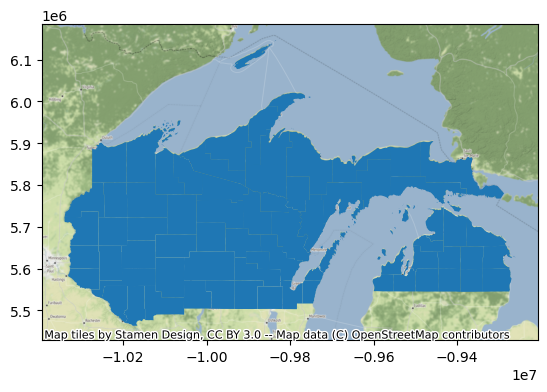